In [ ]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib

In [ ]:
# !pip install xgboost

In [3]:
# Import the dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore', FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [4]:
# Import the dependencies
from sklearn.metrics import plot_confusion_matrix

In [5]:
# import csv into a dataframe
data_read = pd.read_csv("../resources/fraudTrain.csv")
data_read.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Up Sampling minority class

In [6]:
from sklearn.utils import resample

In [7]:
#separate majority and minority classes
df_majority = data_read[data_read.is_fraud==0]
df_minority = data_read[data_read.is_fraud==1]
print(df_majority.size)
print(df_minority.size)
data_read.is_fraud.value_counts()

29650887
172638


0    1289169
1       7506
Name: is_fraud, dtype: int64

In [8]:
# Upsample minority class
# nsamples = df_majority.is_fraud.count()

nsamples = round(df_majority.is_fraud.count()/2).astype(int)

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=nsamples,    # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled.is_fraud.value_counts()

1    644584
Name: is_fraud, dtype: int64

In [9]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69495,69495,2019-02-10 23:27:41,4669558618943766,fraud_Boyer-Reichert,shopping_net,980.79,Daniel,Hernandez,M,7340 Mcgrath Islands,...,41.1039,-72.3674,4299,Broadcast presenter,1968-10-26,e1929fa20733c22938029276c11d1d16,1328916461,41.924326,-72.787852,1
1133864,1133864,2020-04-17 13:51:50,30263540414123,"fraud_Streich, Dietrich and Barton",shopping_net,974.97,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,e26550509ff8bae768d25965f4459059,1366206710,37.589782,-111.710477,1
815199,815199,2019-12-07 23:56:59,4430881574719618,fraud_Schumm PLC,shopping_net,931.28,Alicia,Morales,F,4456 Dunn Roads,...,39.3199,-106.6596,61,Public relations account executive,1939-11-04,2fc589f78dd34f3c5462d53cfde79ff2,1354924619,38.511562,-106.994630,1
273012,273012,2019-05-15 02:28:13,3575540972310993,fraud_Luettgen PLC,gas_transport,6.81,Rachel,Villarreal,F,250 Carrie Throughway,...,34.3396,-89.5736,4198,Curator,2001-06-22,f489de72a73785fc366d7e81d5c055a3,1337048893,34.872931,-89.679913,1


In [10]:
# Convert the date of birth into numeric as age
data_train = df_upsampled
data_train['dob']= pd.to_datetime(data_train['dob'])
data_train['dob']

from datetime import datetime
today = datetime.today()
data_train['age'] = round(data_train['dob'].apply(lambda x: (today - x).days//365.25),0)
data_train['age']

0          32.0
1          42.0
2          58.0
3          53.0
4          34.0
           ... 
69495      52.0
1133864    58.0
815199     81.0
273012     19.0
531951     43.0
Name: age, Length: 1933753, dtype: float64

In [11]:
# Display the dataframe column names
data_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [12]:
# Select the columns which are required for the further processing
data_train = data_train[["category", "cc_num", "amt", "lat","long", "job", "age", "trans_num", 
                         "unix_time", "merch_lat","merch_long", "is_fraud"]]
data_train.head()

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,2703186189652095,4.97,36.0788,-81.1781,"Psychologist, counselling",32.0,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,grocery_pos,630423337322,107.23,48.8878,-118.2105,Special educational needs teacher,42.0,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,entertainment,38859492057661,220.11,42.1808,-112.2620,Nature conservation officer,58.0,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,gas_transport,3534093764340240,45.00,46.2306,-112.1138,Patent attorney,53.0,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,misc_pos,375534208663984,41.96,38.4207,-79.4629,Dance movement psychotherapist,34.0,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### One Hot Encoding

In [13]:
# Encode the transaction number and convert into numeric
from sklearn.preprocessing import LabelEncoder

get_transnum = data_train['trans_num']
label_encoder = LabelEncoder()
label_encoder.fit(get_transnum)
encoded_transnum = label_encoder.transform(get_transnum)
data_train['trans_num'] = encoded_transnum

In [14]:
# Encode the category and convert into numeric
get_category = data_train['category']
label_encoder = LabelEncoder()
label_encoder.fit(get_category)
encoded_category = label_encoder.transform(get_category)
data_train['category'] = encoded_category

In [15]:
# Encode the job and convert into numeric
get_job = data_train['job']
label_encoder = LabelEncoder()
label_encoder.fit(get_job)
encoded_job = label_encoder.transform(get_job)
data_train['job'] = encoded_job

In [16]:
# sets y to is_fraud
target = data_train["is_fraud"].values.reshape(-1, 1)

# Define the features
selected_features = data_train.drop('is_fraud', axis=1)

In [17]:
selected_features

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long
0,8,2703186189652095,4.97,36.0788,-81.1781,370,32.0,56438,1325376018,36.011293,-82.048315
1,4,630423337322,107.23,48.8878,-118.2105,428,42.0,159395,1325376044,49.159047,-118.186462
2,0,38859492057661,220.11,42.1808,-112.2620,307,58.0,818703,1325376051,43.150704,-112.154481
3,2,3534093764340240,45.00,46.2306,-112.1138,328,53.0,544575,1325376076,47.034331,-112.561071
4,9,375534208663984,41.96,38.4207,-79.4629,116,34.0,831111,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...
69495,11,4669558618943766,980.79,41.1039,-72.3674,52,52.0,1142762,1328916461,41.924326,-72.787852
1133864,11,30263540414123,974.97,37.7175,-112.4777,215,58.0,1146982,1366206710,37.589782,-111.710477
815199,11,4430881574719618,931.28,39.3199,-106.6596,378,81.0,241911,1354924619,38.511562,-106.994630
273012,2,3575540972310993,6.81,34.3396,-89.5736,114,19.0,1238805,1337048893,34.872931,-89.679913


## Split and Scale the data

In [18]:
# Import the dependecnies
from sklearn.model_selection import train_test_split

# Split the selected dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

In [20]:
# X_train.to_csv("../exporteddata/correlation_balanced.csv")

In [21]:
# Scale the train & test datasets
from sklearn.preprocessing import StandardScaler

# Create a standard scaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the scaled data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest Classifier

In [22]:
# Use the Random Forest Classifier Model to get the feature importance/weightage
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the random forest model to X and y
rf = rf.fit(X_train_scaled, y_train)

# Return the importance of each column to predicting the outcomes
importances = rf.feature_importances_
importances

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0.12655937, 0.01394629, 0.72159964, 0.01383046, 0.01303681,
       0.01527196, 0.02128448, 0.01414655, 0.02837164, 0.01594952,
       0.01600328])

In [23]:
# Sort each column in order of importance
rf_weights = sorted(zip(importances, selected_features.keys()), reverse=True)
rf_weights

[(0.7215996449939228, 'amt'),
 (0.12655936943328505, 'category'),
 (0.02837163702162392, 'unix_time'),
 (0.021284481855335317, 'age'),
 (0.016003281559766422, 'merch_long'),
 (0.015949515281353296, 'merch_lat'),
 (0.015271958918671244, 'job'),
 (0.01414655076520924, 'trans_num'),
 (0.013946286475219758, 'cc_num'),
 (0.01383046365159118, 'lat'),
 (0.013036810044021857, 'long')]

In [24]:
# Convert the weighted feature list into a dataframe
rf_weighted_df = pd.DataFrame(rf_weights)
rf_weighted_df

,0,1
0,0.721600,amt
1,0.126559,category
2,0.028372,unix_time
3,0.021284,age
4,0.016003,merch_long
5,0.015950,merch_lat
6,0.015272,job
7,0.014147,trans_num
8,0.013946,cc_num
9,0.013830,lat


In [25]:
# Save the dataframe into a csv file for plotting
rf_weighted_df.to_csv("../exporteddata/random_forest_balanced.csv")

In [26]:
### Plot the random forest features

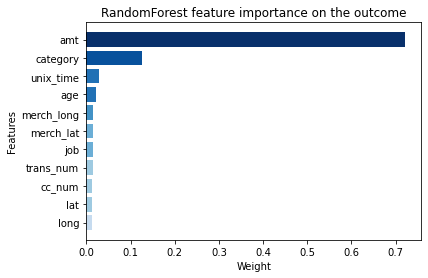

In [27]:
colors = ['#c6dbef','#9ecae1','#9ecae1','#9ecae1','#6baed6','#6baed6','#4292c6','#2171b5','#2171b5','#08519c','#08306b','#023858']
sorted_idx = importances.argsort()
# plt.barh(selected_features.columns[sorted_idx], importances[sorted_idx], color=['#FFFFCC',#D9F0A3','#ADDD8E','#78C679','#31A354','#006837'])
plt.barh(selected_features.columns[sorted_idx], importances[sorted_idx], color=colors)

plt.title("RandomForest feature importance on the outcome")
plt.ylabel("Features")
plt.xlabel("Weight")
plt.savefig("../static/images/randomforest_balanced.jpg")
plt.show()

### Plot the histogram for the most weighted feature, Amount

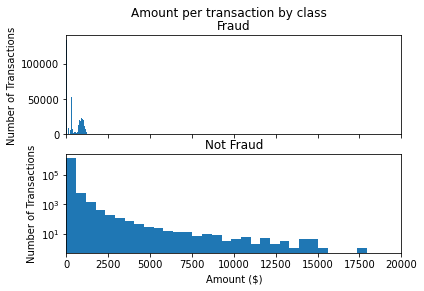

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

data_notfraud = data_train[data_train.is_fraud==0]
data_fraud = data_train[data_train.is_fraud==1]

bins = 50

ax1.hist(data_fraud.amt, bins = bins)
ax1.set_title('Fraud')
ax1.set_ylabel('Number of Transactions')

ax2.hist(data_notfraud.amt, bins = bins)
ax2.set_title('Not Fraud')
ax2.set_ylabel('Number of Transactions')

plt.xlabel('Amount ($)')
# plt.ylabel('Number of Transactions')

plt.xlim((0, 20000))
plt.yscale('log')
plt.savefig("../static/images/histogram_balanced.jpg")
plt.show();

### Correlation Diagram

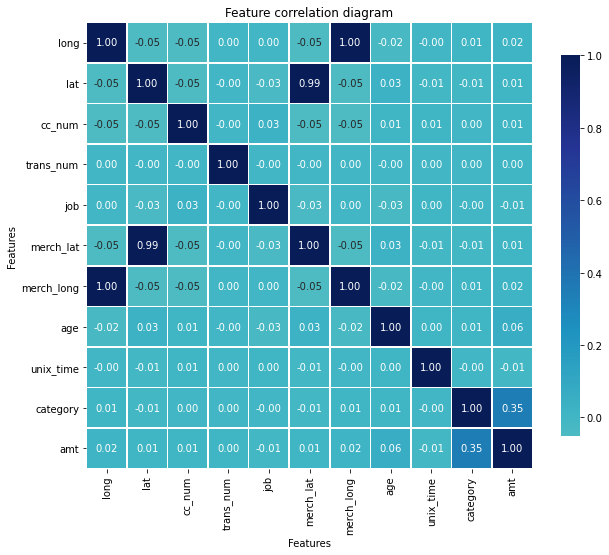

In [30]:
import seaborn as sns
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.title("Feature correlation diagram")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.savefig("../static/images/correlation_balanced.jpg")
    plt.show();

correlation_heatmap(X_train[selected_features.columns[sorted_idx]])


## Logistic Regression

In [31]:
# Import the dependencies for logistic regression model
from sklearn import set_config
from sklearn.linear_model import LogisticRegression

In [32]:
# Define logisitic regression model
logistic_regn_model = LogisticRegression()
set_config(print_changed_only=False)
print(logistic_regn_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [33]:
# Train the data with the logisitic regression model
logistic_regn_model.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Print the training score for training and testing datasets
print(f"Training Data Score: {logistic_regn_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regn_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.89511098975808
Testing Data Score: 0.8948450580114554


In [35]:
# Make predictions with the test data
lr_predictions = logistic_regn_model.predict(X_test_scaled)
print(f"First 10 Predictions:   {lr_predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
print( np.unique(lr_predictions) )

First 10 Predictions:   [0 1 0 0 0 1 1 1 0 0]
First 10 Actual labels: [[0], [1], [0], [0], [0], [1], [1], [1], [0], [0]]
[0 1]


### Gradient Boosting Regressor model

In [32]:
# fitting Gradient Boosting Regressor model to see accuracy
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

gradient = GradientBoostingRegressor(alpha=.01).fit(X_train_scaled, y_train)
predictions = gradient.predict(X_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = gradient.score(X_test_scaled, y_test)
print(f"MSE: {MSE}, R2: {r2}")

print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE: 0.035585843749141734, R2: 0.8399800466557318
First 10 Predictions:   [ 0.05797611  0.98595172 -0.07373144  0.00953654  0.04118071  0.97806889
  0.98146615  0.992549    0.10511484 -0.0016908 ]
First 10 Actual labels: [[0], [1], [0], [0], [0], [1], [1], [1], [0], [0]]


In [33]:
print(predictions)

[ 0.05797611  0.98595172 -0.07373144 ...  0.05048949 -0.01394933
  0.98644957]


### XGBoost Model

In [36]:
from xgboost import XGBRegressor

In [37]:
xgb = XGBRegressor(n_estimators=20)
xgb.fit(X_train_scaled, y_train)
xgb.feature_importances_

array([0.22539912, 0.01152546, 0.64768624, 0.00958428, 0.00971577,
       0.01396109, 0.04199289, 0.00904145, 0.0125443 , 0.00973072,
       0.00881873], dtype=float32)

In [38]:
xgb_weights = sorted(zip(xgb.feature_importances_, selected_features.keys()), reverse=True)

In [39]:
xgb_df = pd.DataFrame(xgb_weights)
xgb_df.to_csv("../exporteddata/xgboost_features_balanced.csv")

<function matplotlib.pyplot.show(*args, **kw)>

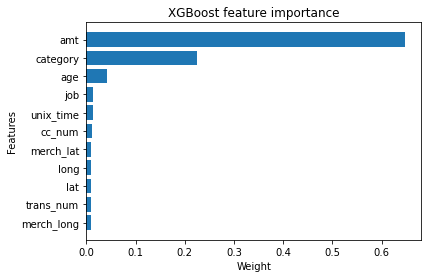

In [40]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(selected_features.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.title("XGBoost feature importance")
plt.xlabel("Weight")
plt.ylabel("Features")
plt.savefig("../static/images/xgb_balanced")
plt.show

### Gaussian Naïve Bayes Model

In [41]:
from sklearn.naive_bayes import GaussianNB 
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
gnb_prediction = gnb_model.predict(X_test_scaled)

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [42]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, gnb_prediction)*100)

Gaussian Naive Bayes model accuracy(in %): 82.96413818496232


In [43]:
print(f"First 10 Predictions:   {gnb_prediction[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 1 0 1 0 0]
First 10 Actual labels: [[0], [1], [0], [0], [0], [1], [1], [1], [0], [0]]


# Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [45]:
# Confusion Matrix for Gaussian Naive Bayes Model
metrics.confusion_matrix(gnb_prediction, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, gnb_prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  316193
False Positives:  5865
False Negatives:  76493
True Positives:  84888


In [46]:
# Confusion Matrix for Logistic Regression Model
lr_predicted = logistic_regn_model.predict(X_test_scaled)
cf_matrix = metrics.confusion_matrix(lr_predicted, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, lr_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  315772
False Positives:  6286
False Negatives:  44550
True Positives:  116831


In [47]:
import seaborn as sns

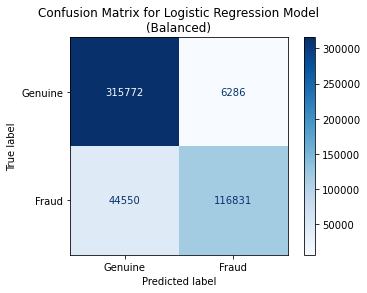

In [48]:
# Plot the confusion matrix chart
class_names =["0","1"]
plot_confusion_matrix(logistic_regn_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression Model\n(Balanced)")
plt.savefig("../static/images/cmatrix_logreg_balanced.jpg")
plt.show()

AttributeError: 'QuadMesh' object has no property 'border'

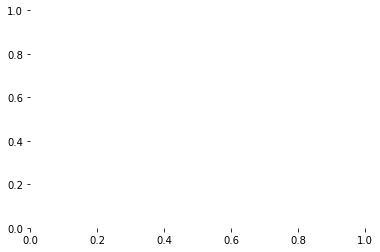

In [49]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]


labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

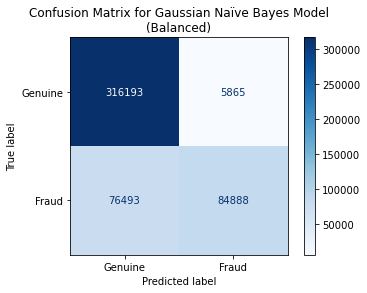

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
class_names =["Genuine","Fraud"]
# plt.figure()
plot_confusion_matrix(gnb_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Gaussian Naïve Bayes Model\n(Balanced)")
plt.savefig("../static/images/cmatrix_gnb_balanced.jpg")
plt.show()

## Classification Report

In [51]:
from sklearn.metrics import classification_report

In [52]:
#Classification Report for Gaussian Naïve Bayes 
print(classification_report(y_test, gnb_prediction,
                           target_names=['Genuine','Fraud']))

              precision    recall  f1-score   support

     Genuine       0.81      0.98      0.88    322058
       Fraud       0.94      0.53      0.67    161381

    accuracy                           0.83    483439
   macro avg       0.87      0.75      0.78    483439
weighted avg       0.85      0.83      0.81    483439



In [53]:
#Classification Report for logisitc Regression Model
print(classification_report(y_test, lr_predictions,
                           target_names=['Genuine','Fraud']))

              precision    recall  f1-score   support

     Genuine       0.88      0.98      0.93    322058
       Fraud       0.95      0.72      0.82    161381

    accuracy                           0.89    483439
   macro avg       0.91      0.85      0.87    483439
weighted avg       0.90      0.89      0.89    483439



In [54]:
# save the best trained model- Logistic Regression Model for the flask app
import joblib
filename = 'logistic_balanced_model.sav'
joblib.dump(logistic_regn_model, filename)


['logistic_balanced_model.sav']

In [55]:
# save the best trained model- Logistic Regression Model for the flask app
import joblib
filename = 'gnb_balanced_model.sav'
joblib.dump(gnb_model, filename)

['gnb_balanced_model.sav']